In [ ]:
# https://www.kaggle.com/dansbecker/transfer-learning

In [1]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense

resnet_weights_path = "/home/tdpearson/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = ResNet50(weights=resnet_weights_path, pooling='avg', include_top=False)
# For retraining purposes we want pre-trained weights except its TOP layer. We use the pre-trained weights to initialize for training new layer using new training images.

new_model = Sequential()
new_model.add(base_model)
new_model.add(Dense(units=2, activation='softmax'))

# Freeze the base model - we do not want to modify the previously trained weightings
new_model.layers[0].trainable = False


Using TensorFlow backend.


In [2]:
new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
base_model.layers

In [4]:
new_model.layers

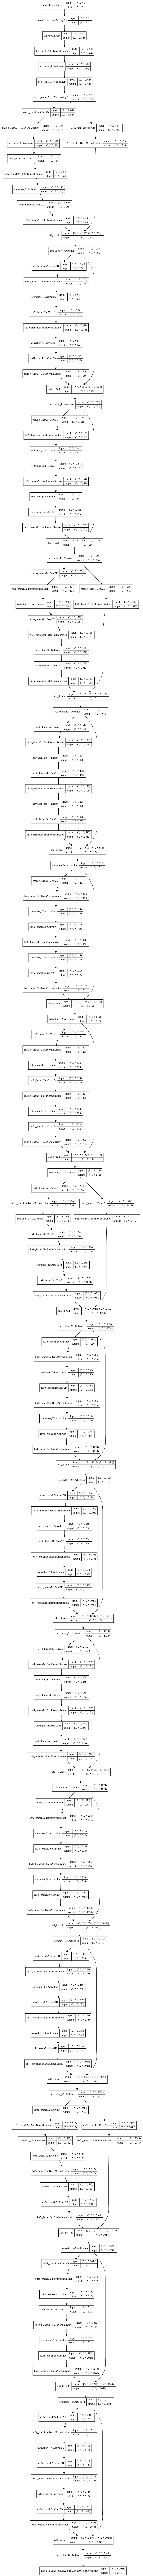

In [5]:
dot_img_file = '/tmp/model_1.png'
keras.utils.plot_model(base_model, to_file=dot_img_file, show_shapes=True)

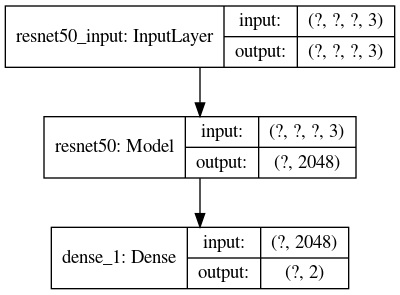

In [6]:
dot_img_file = '/tmp/model_2.png'
keras.utils.plot_model(new_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)